In [1]:
print("Cluster Analysis")

Cluster Analysis


### Introduction to Unsupervised Learning
- Unsupervised Learning is a type of Machine learning to draw inferences from unlabelled datasets.
- Model tries to find relationship between data.
- Most common unsupervised learning method is clustering which is used for exploratory data analysis to find hidden patterns or grouping in data
#### 1. Clustering
- A learning technique to group a set of objects in such a way that objects of same group are more similar to each other than from objects of other group.
- Applications of clustering are as follows
- Automatically organizing the data
- Labeling data
- Understanding hidden structure of data
- News Cloustering for grouping similar news together
- Customer Segmentation
- Suggest social groups

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

- Generating natural cluster

In [4]:
X,y = make_blobs(n_features=2, n_samples=1000, centers=3, cluster_std=1, random_state=3)
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

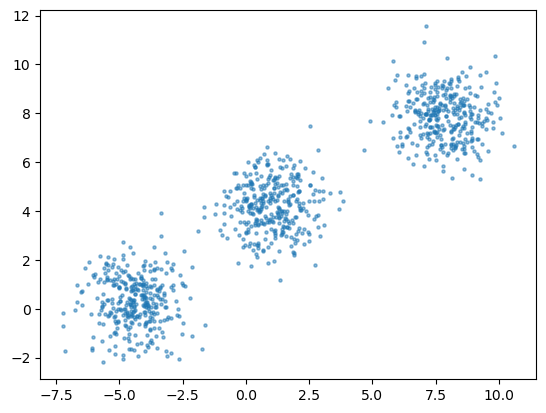

In [5]:
plt.show()

#### 2. Distance or Similarity Function
- Data belonging to same cluster are similar & data belonging to different cluster are different.
- We need mechanisms to measure similarity & differences between data.
- This can be achieved using any of the below techniques.
- Minkowiski breed of distance calculation:
- 
1. Manhatten (p=1), Euclidian (p=2)
2. Cosine: Suited for text data

In [6]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

In [7]:
X = [[0, 1], [1, 1]]

In [8]:
euclidean_distances(X, X)

array([[0., 1.],
       [1., 0.]])

In [9]:
euclidean_distances(X, [[0,0]])

array([[1.        ],
       [1.41421356]])

In [10]:
cosine_distances(X,X)

array([[0.        , 0.29289322],
       [0.29289322, 0.        ]])

In [11]:
manhattan_distances(X,X)

array([[0., 1.],
       [1., 0.]])

#### 3. Clustering as an Optimization Problem
- Maximize inter-cluster distances
- Minimize intra-cluster distances
#### 4. Types of Clustering
###### Partitioning methods
- Partitions n data into k partitions
- Initially, random partitions are created & gradually data is moved across different partitions.
- It uses distance between points to optimize clusters.
- KMeans & Meanshift are examples of Partitioning methods
###### Hierarchical methods
- These methods does hierarchical decomposition of datasets.
- One approach is, assume each data as cluster & merge to create a bigger cluster
- Another approach is start with one cluster & continue splitting
###### Density-based methods
- All above techniques are distance based & such methods can find only spherical clusters and not suited for clusters of other shapes.
- Continue growing the cluster untill the density exceeds certain threashold.
#### 5. Partitioning Method
###### KMeans
- Minimizing creteria : within-cluster-sum-of-squares.
- The centroids are chosen in such a way that it minimizes within cluster sum of squares.

- The k-means algorithm divides a set of samples into disjoint clusters, each described by the mean of the samples in the cluster. 

##### KMeans Algorithm
- Initialize k centroids.
- Assign each data to the nearest centroid, these step will create clusters.
 -Recalculate centroid - which is mean of all data belonging to same cluster.
- Repeat steps 2 & 3, till there is no data to reassign a different centroid.

- 
- Animation to explain algo - http://tech.nitoyon.com/en/blog/2013/11/07/k-means/



In [12]:
from sklearn.datasets import make_blobs, make_moons

In [13]:
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=.5)

In [14]:
plt.scatter(X[:,0], X[:,1],s=10)

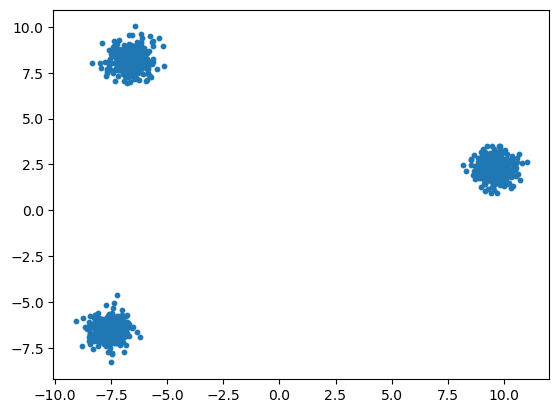

In [15]:
plt.show()

In [16]:
from sklearn.cluster import KMeans, MeanShift

In [17]:
kmeans = KMeans(n_clusters=3)

In [18]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [19]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

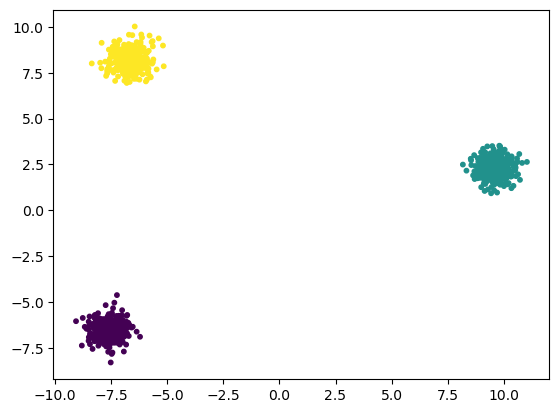

In [20]:
plt.show()

In [21]:
X, y = make_moons(n_samples=1000, noise=.09)

In [22]:
plt.scatter(X[:,0], X[:,1],s=10)

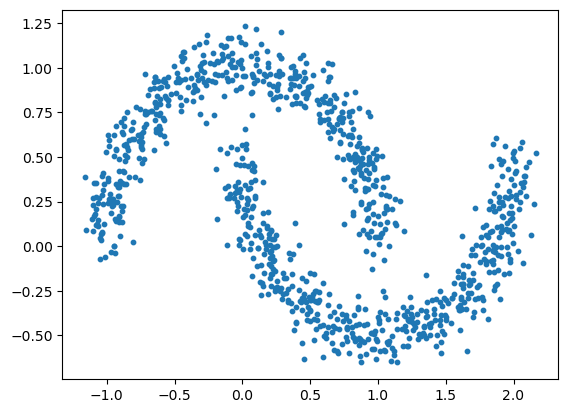

In [23]:
plt.show()

In [24]:
kmeans = KMeans(n_clusters=2)

In [25]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [26]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

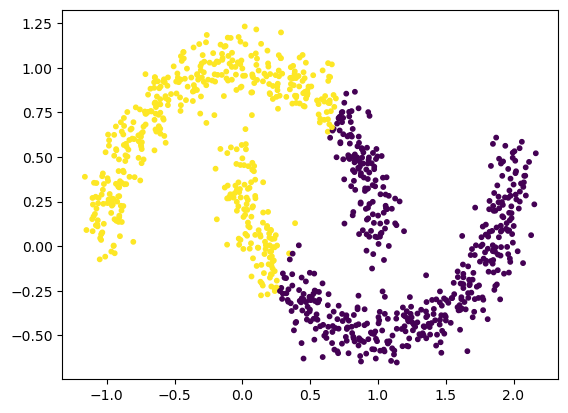

In [27]:
plt.show()

##### Limitations of KMeans
- Assumes that clusters are convex & behaves poorly for elongated clusters.
- Probability for participation of data to multiple clusters.
- KMeans tries to find local minima & this depends on init value.
##### Meanshift
- Centroid based clustering algorithm.
- Mode can be understood as highest density of data points.

In [28]:
kmeans = KMeans(n_clusters=4)

In [29]:
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [30]:
plt.scatter(X[:,0], X[:,1],s=10)

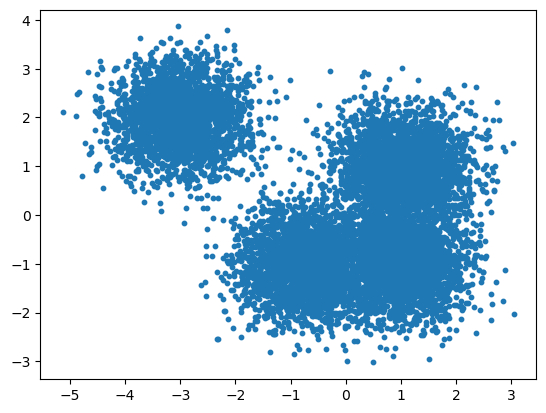

In [31]:
plt.show()

In [32]:
kmeans = KMeans(n_clusters=4)

In [33]:
ms = MeanShift()

In [34]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [35]:
ms.fit(X)

MeanShift()

In [36]:
plt.scatter(X[:,0], X[:,1],s=10, c=ms.predict(X))

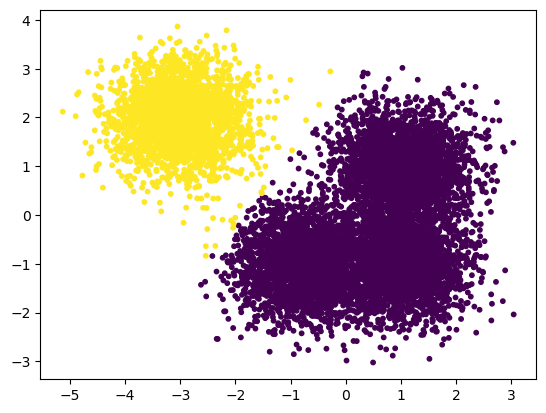

In [37]:
plt.show()

In [38]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

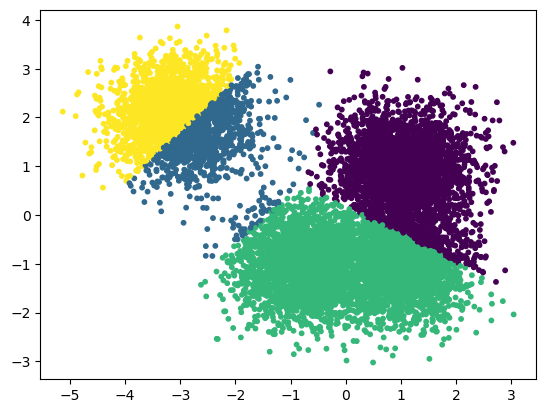

In [39]:
plt.show()

#### 6. Hierarchial Clustering
- A method of clustering where you combine similar clusters to create a cluster or split a cluster into smaller clusters such they now they become better.
- Two types of hierarchaial Clustering
1. Agglomerative method, a botton-up approach.
2. Divisive method, a top-down approach.
##### Agglomerative method
- Start with assigning one cluster to each data.
- Combine clusters which have higher similarity.
- Differences between methods arise due to different ways of defining distance (or similarity) between clusters. The following sections describe several agglomerative techniques in detail.
1. Single Linkage Clustering
2. Complete linkage clustering
3. Average linkage clustering
4. Average group linkage

In [40]:
X, y = make_moons(n_samples=1000, noise=.05)
plt.scatter(X[:,0], X[:,1],s=10)

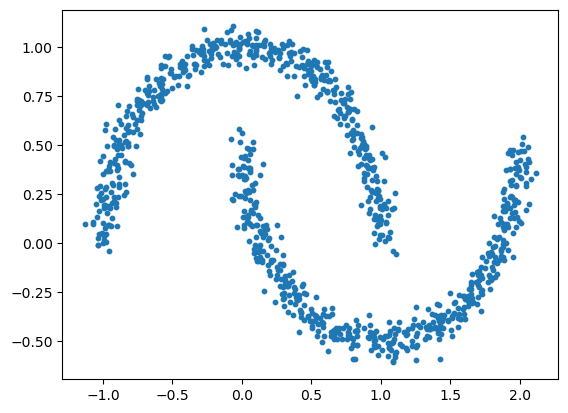

In [41]:
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
agc = AgglomerativeClustering(linkage='single')

In [44]:
agc.fit(X)

AgglomerativeClustering(linkage='single')

In [45]:
plt.scatter(X[:,0], X[:,1],s=10,c=agc.labels_)

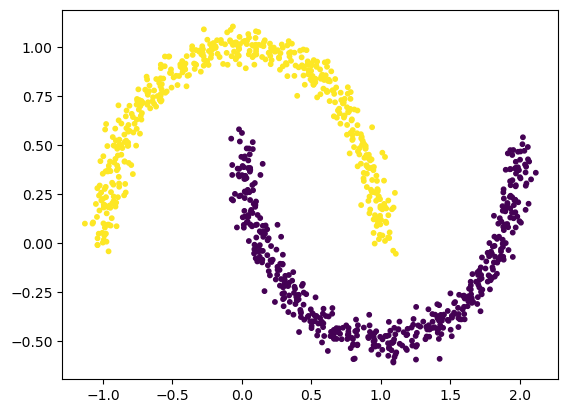

In [46]:
plt.show()

#### 7. Density Based Clustering - DBSCAN
- Groups data theat is closer to each other
- Does not use distance vector calculation method

In [47]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

In [48]:
plt.scatter(X[:,0], X[:,1],s=10)

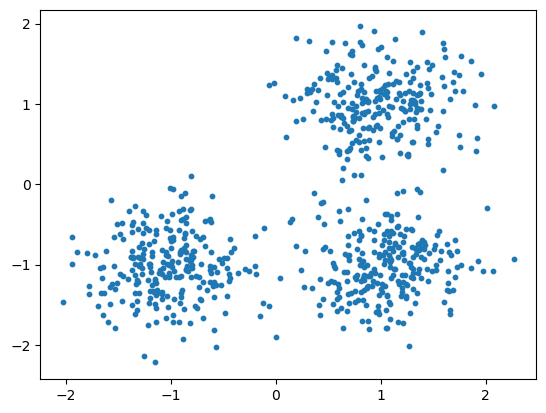

In [49]:
plt.show()

In [50]:
from sklearn.cluster import DBSCAN

In [51]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [52]:
plt.scatter(X[:,0], X[:,1],s=10,c=labels)

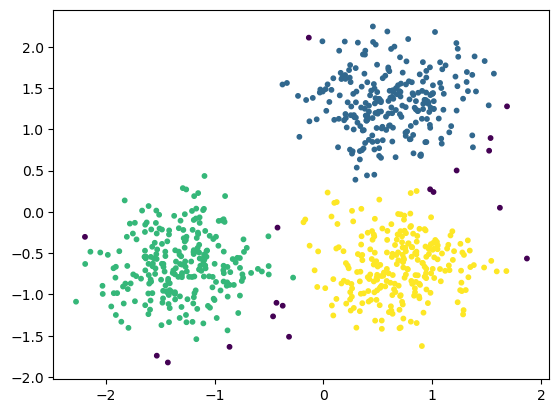

In [53]:
plt.show()

#### 8. Measuring Performance of Clusters
- Two forms of evaluation
- supervised, which uses a ground truth class values for each sample.
1. completeness_score
2. homogeneity_score
- unsupervised, which measures the quality of model itself
1. silhoutte_score
2. calinski_harabaz_score
##### completeness_score
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
- Accuracy is 1.0 if data belonging to same class belongs to same cluster, even if multiple classes belongs to same cluster

In [54]:
from sklearn.metrics.cluster import completeness_score

In [55]:
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

- The acuracy is 1.0 because all the data belonging to same class belongs to same cluster

In [56]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

- The accuracy is .3 because class 1 - [11,22,11], class 2 - [22]

In [57]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0



##### homogeneity_score
- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

In [58]:
from sklearn.metrics.cluster import homogeneity_score

In [59]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [60]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [61]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

- Same class data is broken into two clusters
##### silhoutte_score
- The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
- The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.
- Example : Selecting the number of clusters with silhouette analysis on KMeans clustering

In [62]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

In [63]:
plt.scatter(X[:,0],X[:,1],s=10)

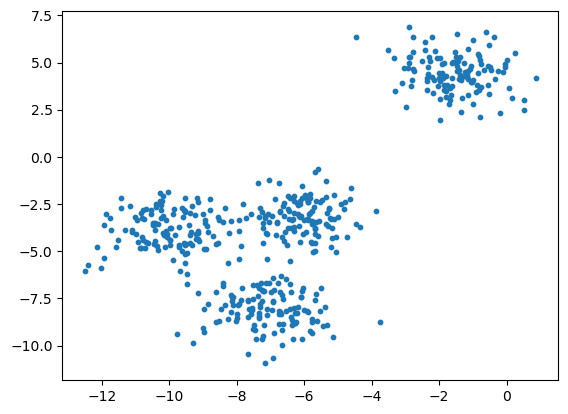

In [64]:
plt.show()

In [65]:
range_n_clusters = [2, 3, 4, 5, 6]

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [67]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))

2 0.7049787496083261
3 0.5882004012129721
4 0.6505186632729437
5 0.5743946554642042
6 0.5010203351920864


- Optimal number of clusters seems to be 2
#### calinski_harabaz_score
- The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

In [72]:
#from sklearn.metrics import calinski_harabaz_score # renamed
from sklearn.metrics import calinski_harabasz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabasz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2211.3118296081966
6 1973.4761559528238
